In [1]:
# pip install seaborn

In [2]:
import random
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings

In [4]:
# Evita que muestre algunas advertencias cuando reemplzamos columnas en pandas
warnings.filterwarnings('ignore')

In [5]:
seed = 12345

### Funciones

In [6]:
def clip_perc(df,var,perc = [.01,.025,.05,.075,.1,.25]):
    
    clip_left = np.percentile(df[var], 0)
    clip_right = np.percentile(df[var], 100)
    perc_left = np.nan
    perc_right = np.nan

    for i in perc:
        
        p_left = np.percentile(df[var], i * 100)

        if (clip_left <= 2 * p_left):
            clip_left = p_left
            perc_left = i
            break

    for i in perc:
        
        p_right = np.percentile(df[var], (1 - i) * 100)
        
        if (clip_right >= 2 * p_right):
            clip_right = p_right
            perc_right = (1 - i)
            break

    return [ [perc_left, perc_right], [clip_left, clip_right] ]

In [7]:
data_creditos = pd.read_csv('../01-aprendizaje_supervisado/loan_prediction.csv')

In [8]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
data_creditos.describe(percentiles=[.9,.925,.95,.975,.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
92.5%,10752.075000,4300.025000,259.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
97.5%,17948.875000,6666.675000,384.500000,363.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000


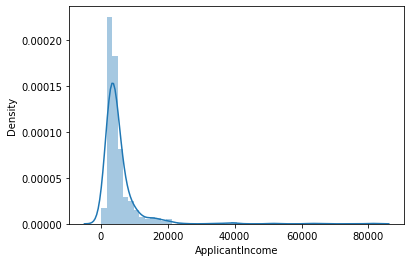

In [10]:
# sns.histplot(data= data_creditos, x = 'ApplicantIncome')
sns.distplot(data_creditos['ApplicantIncome'])

In [11]:
data_creditos.shape

(614, 13)

In [12]:
data_creditos.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
porc_nulls = round(data_creditos.isnull().sum() * 100 / data_creditos.shape[0], 2).values
labels = data_creditos.columns.values

In [14]:
len(porc_nulls)

13

In [15]:
import matplotlib.pyplot as plt

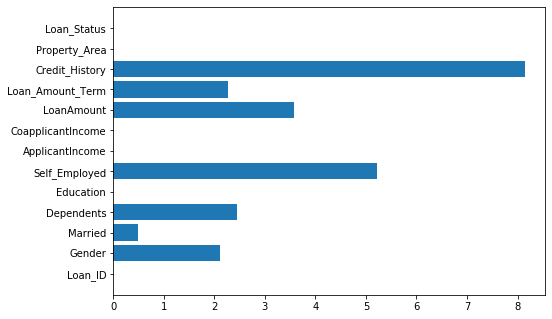

In [16]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = labels
students = porc_nulls
ax.barh(langs,students)
plt.show()

In [17]:
data_creditos.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [18]:
data_creditos.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001123,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [19]:
data_creditos['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [20]:
data_creditos['Loan_Status'] = data_creditos['Loan_Status'].map({'Y':0,'N':1})

In [21]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [22]:
data_creditos['Dependents'] = data_creditos['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

Train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data_creditos.drop(['Loan_ID','Loan_Status'], axis=1)
y = data_creditos['Loan_Status']

In [25]:
# random state es la semilla
# stratify yes es para mantener la proporccion del target en el train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12345, stratify=y)

In [26]:
y.mean()

0.3127035830618892

In [27]:
y_train.mean()

0.3136456211812627

In [28]:
y_test.mean()

0.3089430894308943

# Imputacion de nulos

In [29]:
X_train.isnull().sum()

Gender               12
Married               3
Dependents           14
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
Property_Area         0
dtype: int64

In [30]:
# eliminamos registros con nulos en columnas
X_aux = X_train.dropna(subset=['LoanAmount','Loan_Amount_Term'])

In [31]:
X_aux.isnull().sum()

Gender               12
Married               2
Dependents           11
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       35
Property_Area         0
dtype: int64

In [32]:
X_train.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [33]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [34]:
X_train_num.isnull().sum()

Dependents           14
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     13
Credit_History       36
dtype: int64

In [35]:
X_train_num.median()

Dependents              0.0
ApplicantIncome      3814.0
CoapplicantIncome    1086.0
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer_num = SimpleImputer(strategy="median")

In [38]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

In [39]:
imputer_num.statistics_

array([0.000e+00, 3.814e+03, 1.086e+03, 1.280e+02, 3.600e+02, 1.000e+00])

In [40]:
imputer_num.transform(X_train_num)

array([[0.000e+00, 3.418e+03, 0.000e+00, 1.270e+02, 3.600e+02, 1.000e+00],
       [1.000e+00, 4.606e+03, 0.000e+00, 8.100e+01, 3.600e+02, 1.000e+00],
       [2.000e+00, 3.547e+03, 0.000e+00, 8.000e+01, 3.600e+02, 0.000e+00],
       ...,
       [0.000e+00, 3.727e+03, 1.775e+03, 1.310e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 5.116e+03, 1.451e+03, 1.650e+02, 3.600e+02, 0.000e+00],
       [0.000e+00, 6.096e+03, 0.000e+00, 2.180e+02, 3.600e+02, 0.000e+00]])

In [41]:
 X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns=X_train_num.columns)

In [42]:
X_train_num_imputed.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [43]:
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(data = imputer_cat.transform(X_train_cat), columns=X_train_cat.columns)

In [44]:
imputer_cat.statistics_

array(['Male', 'Yes', 'Graduate', 'No', 'Semiurban'], dtype=object)

In [45]:
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [46]:
X_train_num_imputed.describe(percentiles=[.01,.025,.05,.1,.25,.5,.75,.9,.925,.95,.975,.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
1%,0.000000,967.400000,0.000000,35.900000,84.000000,0.000000
2.5%,0.000000,1606.250000,0.000000,50.000000,180.000000,0.000000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000


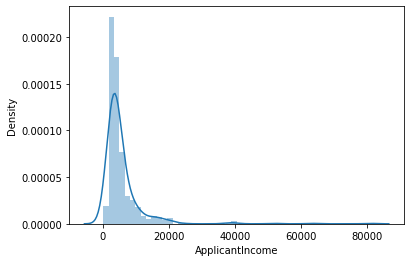

In [47]:
# sns.histplot(data=X_train_num_imputed,x='ApplicantIncome')
sns.distplot(X_train_num_imputed['ApplicantIncome'])

In [48]:
X_train_num_imputed['log_Income'] = np.log10(X_train_num_imputed['ApplicantIncome'])

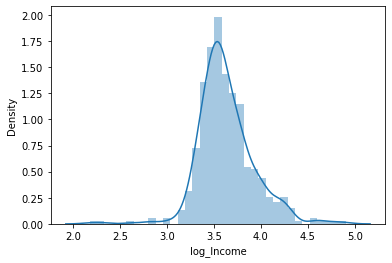

In [49]:
# sns.histplot(data=X_train_num_imputed,x='log_Income')
sns.distplot(X_train_num_imputed['log_Income'])

In [50]:
p5_income = np.percentile(X_train_num_imputed['ApplicantIncome'],5)
p95_income = np.percentile(X_train_num_imputed['ApplicantIncome'],95)
p1_income = np.percentile(X_train_num_imputed['ApplicantIncome'],1)
p99_income = np.percentile(X_train_num_imputed['ApplicantIncome'],99)

In [51]:
X_train_num_imputed['ApplicantIncome_5'] = np.clip(X_train_num_imputed['ApplicantIncome'],p5_income,p95_income)
X_train_num_imputed['ApplicantIncome_1'] = np.clip(X_train_num_imputed['ApplicantIncome'],p1_income,p99_income)

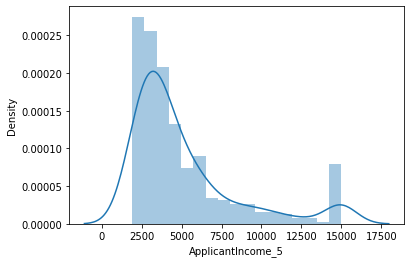

In [52]:
# sns.histplot(data=X_train_num_imputed,x='ApplicantIncome_5')
sns.distplot(X_train_num_imputed['ApplicantIncome_5'])

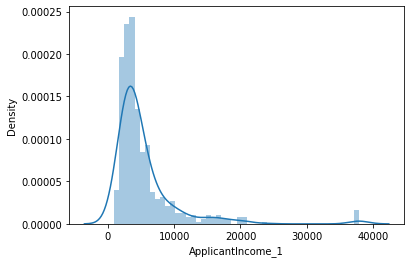

In [53]:
# sns.histplot(data=X_train_num_imputed,x='ApplicantIncome_1')
sns.distplot(X_train_num_imputed['ApplicantIncome_1'])

In [54]:
# un criterio para imputar de manera automatica es hacer el comparativo por variable de que si el maximo valor y el percentil maximo observado es al menos el doble, entonces se imputa.

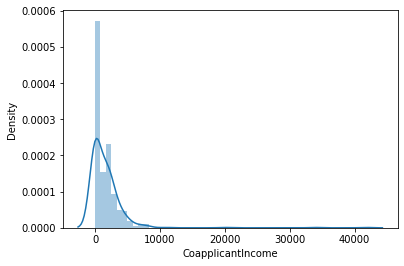

In [55]:
# sns.histplot(data=X_train_num_imputed,x='CoapplicantIncome')
sns.distplot(X_train_num_imputed['CoapplicantIncome'])

# Imputacion categoricas

In [56]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed,drop_first=True).head()

# Consolidacion

In [57]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
209,Male,No,0.0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban
426,Female,No,1.0,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural


In [58]:
X_train_num_imputed.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0


In [59]:
X_train_cat_dummies.head(2)

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,0
1,0,0,1,0,0,0


In [60]:

var_num = X_train_num_imputed.columns.values
var = []
clip_columns = []

for i in var_num:
    clip_values = []
    clip_Array = clip_perc(X_train_num_imputed, i)
    var.append(i)
    clip_values.append(clip_Array[0][0])
    clip_values.append(clip_Array[0][1])
    clip_values.append(clip_Array[1][0])
    clip_values.append(clip_Array[1][1])
    clip_columns.append(clip_values)

df_clip = pd.DataFrame(clip_columns, index=var, columns=['pec_left','pec_right','clip_left','clip_right'])
df_clip.head(2)

,pec_left,pec_right,clip_left,clip_right
Dependents,0.01,NaN,0.0,3.0
ApplicantIncome,0.01,0.99,967.4,37861.8


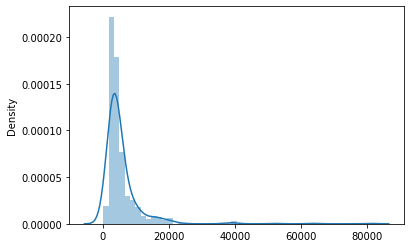

In [61]:
sns.distplot(x = X_train_num_imputed['ApplicantIncome'])

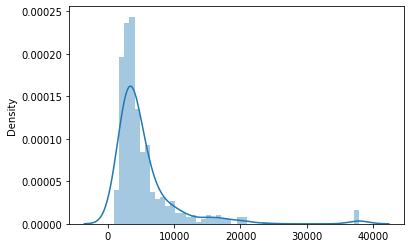

In [62]:
var = 'ApplicantIncome'
a = df_clip.filter(like=var, axis=0).values[0]
var_clip = np.clip(X_train_num_imputed[var],a[2],a[3])
sns.distplot(x = var_clip)

In [63]:
X_train_num_imputed.describe(percentiles=[.01,.025,.05,.1,.25,.5,.75,.9,.925,.95,.975,.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5630.336049,1594.352179,148.315682,344.260692,0.845214,3.629801,5078.159878,5460.896130
std,1.029286,6603.836947,3012.677226,87.184113,61.988258,0.362070,0.295082,3421.612907,5166.358437
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,2.176091,1885.000000,967.400000
1%,0.000000,967.400000,0.000000,35.900000,84.000000,0.000000,2.982866,1885.000000,996.740000
2.5%,0.000000,1606.250000,0.000000,50.000000,180.000000,0.000000,3.205803,1885.000000,1606.250000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000,3.275282,1896.000000,1885.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000,3.344981,2213.000000,2213.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000,3.461948,2897.000000,2897.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000,3.581381,3814.000000,3814.000000


In [64]:
for i in X_train_num_imputed.columns.values:
    a = df_clip.filter(like=i, axis=0).values[0]
    X_train_num_imputed[i] = np.clip(X_train_num_imputed[i],a[2],a[3])

In [65]:
X_train_num_imputed.describe(percentiles=[.01,.025,.05,.1,.25,.5,.75,.9,.925,.95,.975,.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761711,5460.896130,1443.310428,141.300407,344.456212,0.845214,3.634197,4067.378819,5058.147047
std,1.029286,5166.358437,1768.308806,60.769836,61.102153,0.362070,0.280633,1425.652542,3442.226006
min,0.000000,967.400000,0.000000,35.900000,84.000000,0.000000,2.982866,1885.000000,996.740000
1%,0.000000,996.740000,0.000000,35.990000,84.000000,0.000000,2.998287,1885.000000,999.674000
2.5%,0.000000,1606.250000,0.000000,50.000000,180.000000,0.000000,3.205803,1885.000000,1606.250000
5%,0.000000,1885.000000,0.000000,61.000000,180.000000,0.000000,3.275282,1896.000000,1885.000000
10%,0.000000,2213.000000,0.000000,75.000000,300.000000,0.000000,3.344981,2213.000000,2213.000000
25%,0.000000,2897.000000,0.000000,104.000000,360.000000,1.000000,3.461948,2897.000000,2897.000000
50%,0.000000,3814.000000,1086.000000,128.000000,360.000000,1.000000,3.581381,3814.000000,3814.000000


In [66]:
X_train_consolidado = pd.concat([X_train_num_imputed,X_train_cat_dummies], axis=1)

In [67]:
X_train_consolidado.shape

(491, 15)

In [68]:
X_train_consolidado.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3418.0,0.0,127.0,360.0,1.0,3.533772,3418.0,3418.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,4606.0,0.0,81.0,360.0,1.0,3.663324,4606.0,4606.0,0.0,0.0,1.0,0.0,0.0,0.0


# Estandarizacion

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [71]:
scaler.fit(X_train_consolidado)

MinMaxScaler()

In [72]:
X_train_scaled = pd.DataFrame(data = scaler.transform(X_train_consolidado),columns=X_train_consolidado.columns)

In [73]:
X_train_scaled.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_Income,ApplicantIncome_5,ApplicantIncome_1,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.066422,0.0,0.342352,0.69697,1.0,0.286093,0.377586,0.172913,1.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.098622,0.0,0.169485,0.69697,1.0,0.353371,0.670197,0.257753,0.0,0.0,1.0,0.0,0.0,0.0


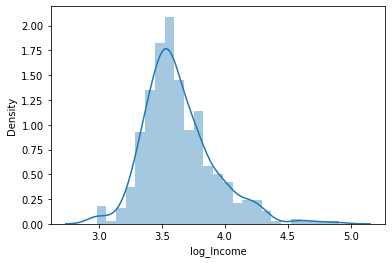

In [74]:
# sns.histplot(data=X_train_consolidado,x='log_Income')
sns.distplot(X_train_num_imputed['log_Income'])

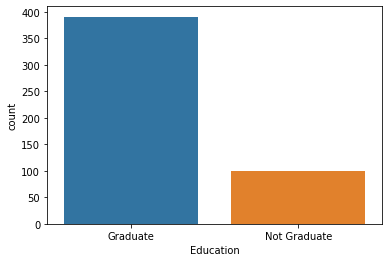

In [75]:
sns.countplot(data = X_train_cat_imputed, x = 'Education')

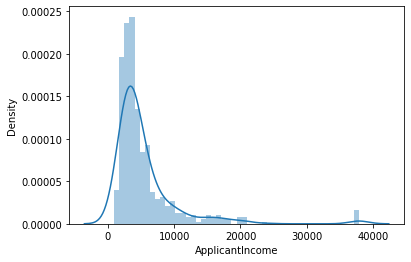

In [76]:
sns.distplot(X_train_num_imputed['ApplicantIncome'])

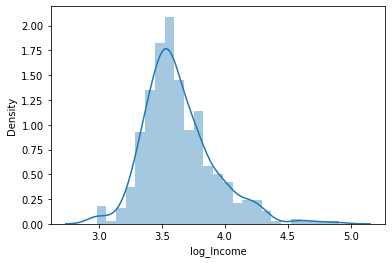

In [77]:
sns.distplot(X_train_num_imputed['log_Income'])

In [78]:
# pip install imblearn

In [79]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [80]:
# Librerias para balancear datos

In [81]:
target = 'Loan_Status'

train = pd.read_csv('../01-aprendizaje_supervisado/train_preprocesed.csv')
test = pd.read_csv('../01-aprendizaje_supervisado/test_preprocesed.csv')

X_train = train.drop(target, axis = 1)
y_train = train[target]

X_test = test.drop(target, axis = 1)
y_test = test[target]

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

In [83]:
def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
y_train_predict = rf.predict(X_train)

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [89]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       1.00      1.00      1.00       154

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [90]:
y_test_predict = rf.predict(X_test)

In [91]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        85
           1       0.72      0.34      0.46        38

    accuracy                           0.76       123
   macro avg       0.74      0.64      0.65       123
weighted avg       0.75      0.76      0.73       123



### Repaso arboles

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       337
           1       0.94      0.50      0.65       154

    accuracy                           0.83       491
   macro avg       0.88      0.74      0.77       491
weighted avg       0.85      0.83      0.82       491

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        85
           1       0.85      0.29      0.43        38

    accuracy                           0.76       123
   macro avg       0.80      0.63      0.64       123
weighted avg       0.78      0.76      0.72       123



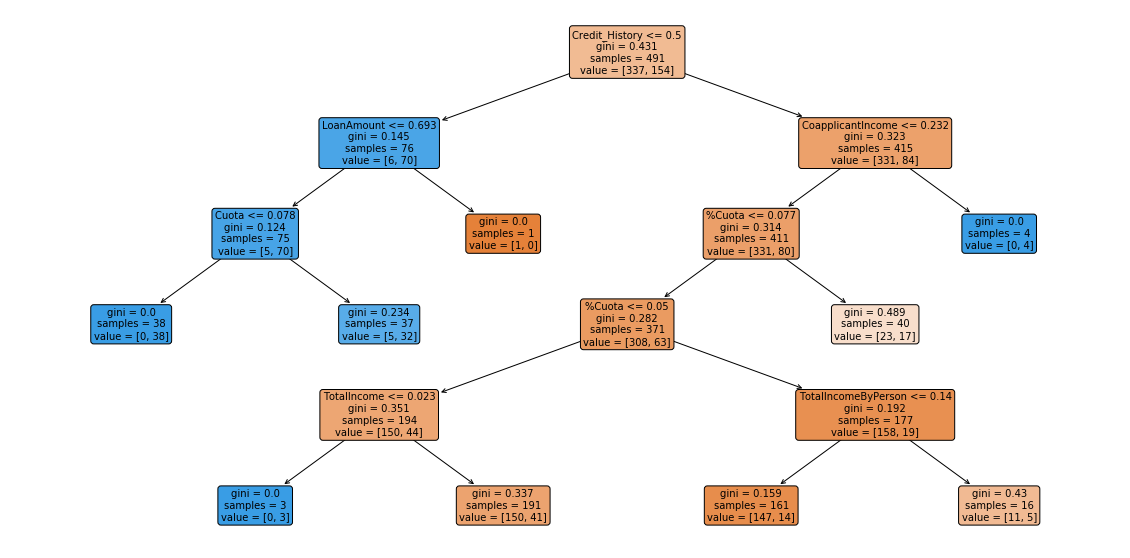

In [93]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=50)
dt.fit(X_train, y_train)

y_train_predict = dt.predict(X_train)
y_test_predict = dt.predict(X_test)

print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

plt.figure(figsize=(20,10))

_ = plot_tree(dt, fontsize = 10,feature_names = X_train.columns, filled=True, rounded=True)

### Random forest con paramentros

In [94]:
rf = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_split=20)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       337
           1       0.93      0.53      0.68       154

    accuracy                           0.84       491
   macro avg       0.88      0.76      0.79       491
weighted avg       0.86      0.84      0.83       491

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        85
           1       0.86      0.32      0.46        38

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.66       123
weighted avg       0.79      0.77      0.73       123



In [95]:
y_train_proba = rf.predict_proba(X_train)[:,1]
y_test_proba = rf.predict_proba(X_test)[:,1]

In [96]:
roc_auc_score(y_train, y_train_proba)

0.8881941500635863

In [97]:
roc_auc_score(y_test, y_test_proba)

0.7176470588235294

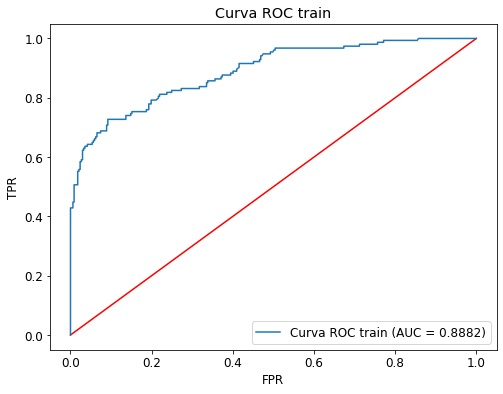

In [98]:
plot_roc_curve(y_train, y_train_proba, 'train')

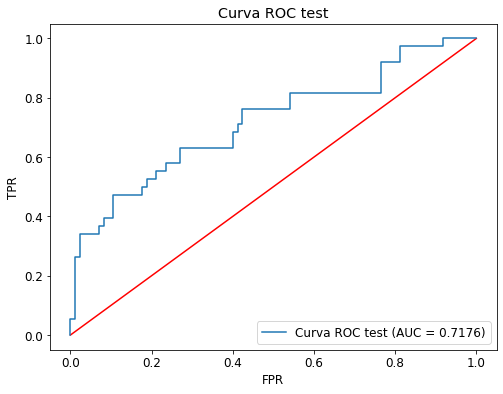

In [99]:
plot_roc_curve(y_test, y_test_proba, 'test')

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
from sklearn.metrics import SCORERS

In [102]:
rf = RandomForestClassifier()

hiperparametros = {'n_estimators': [20, 50],
                   'max_depth': [2, 5, 10],
                #    se suele poner el 5%, 10% y 20%
                   'min_samples_split': [25, 50, 100],
                   'criterion': ['gini', 'entropy']}

In [103]:
gs = GridSearchCV(estimator = rf, param_grid = hiperparametros, scoring = 'roc_auc')

In [104]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'min_samples_split': [25, 50, 100],
                         'n_estimators': [20, 50]},
             scoring='roc_auc')

In [105]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 100,
 'n_estimators': 50}

In [106]:
resultados = pd.DataFrame(gs.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023392,0.001074,0.004958,0.000651,gini,2,25,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.71371,0.770342,0.726529,0.781416,0.707598,0.739919,0.030194,25
1,0.052191,0.002484,0.007868,0.000257,gini,2,25,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.74075,0.722195,0.806692,0.780453,0.687745,0.747567,0.042062,21


In [110]:
# pip install openpyxl

In [111]:
import openpyxl

In [113]:
resultados.to_excel('resultados_random_forest.xlsx')

## XGBOOST

In [114]:
target = 'Loan_Status'

train = pd.read_csv('../01-aprendizaje_supervisado/train_preprocesed.csv')
test = pd.read_csv('../01-aprendizaje_supervisado/test_preprocesed.csv')

X_train = train.drop(target, axis = 1)
y_train = train[target]

X_test = test.drop(target, axis = 1)
y_test = test[target]

In [118]:
# pip install xgboost

  Using cached https://files.pythonhosted.org/packages/d4/60/845dd265c7265d3bd44906d1c15be2908ff0655b32d9000935aeaeef6677/xgboost-1.4.2-py3-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [119]:
import xgboost as xgb

In [120]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test,   label = y_test)

In [121]:
parameters = {'objective': 'binary:logistic',
              'learning_rate': 0.05,
              'max_depth': 4,
              'min_child_weight': 0.5,
              'reg_alpha': 5,
              'reg_lambda': 5,
              'eval_metric': 'auc'}

watch_list  = [(dtrain,'train'),(dtest,'test')]

xgb_fit = xgb.train(params = parameters, dtrain = dtrain, evals = watch_list, 
                    num_boost_round = 500, early_stopping_rounds=50, verbose_eval=1)

[0]	train-auc:0.77463	test-auc:0.68266
[1]	train-auc:0.77485	test-auc:0.68328
[2]	train-auc:0.77496	test-auc:0.68359
[3]	train-auc:0.77857	test-auc:0.68034
[4]	train-auc:0.78394	test-auc:0.69195
[5]	train-auc:0.78400	test-auc:0.69195
[6]	train-auc:0.78420	test-auc:0.69195
[7]	train-auc:0.78414	test-auc:0.69195
[8]	train-auc:0.79247	test-auc:0.70356
[9]	train-auc:0.79252	test-auc:0.70341
[10]	train-auc:0.79252	test-auc:0.70341
[11]	train-auc:0.79257	test-auc:0.70341
[12]	train-auc:0.79252	test-auc:0.70341
[13]	train-auc:0.79257	test-auc:0.70341
[14]	train-auc:0.79252	test-auc:0.70341
[15]	train-auc:0.79252	test-auc:0.70341
[16]	train-auc:0.84160	test-auc:0.74133
[17]	train-auc:0.84160	test-auc:0.74133
[18]	train-auc:0.84168	test-auc:0.74133
[19]	train-auc:0.84376	test-auc:0.74551
[20]	train-auc:0.84357	test-auc:0.74520
[21]	train-auc:0.84472	test-auc:0.74056
[22]	train-auc:0.84565	test-auc:0.74303
[23]	train-auc:0.84355	test-auc:0.73622
[24]	train-auc:0.84553	test-auc:0.73932
[25]	train

In [122]:
xgb_fit.predict(dtest)

array([0.3164955 , 0.28524876, 0.06951594, 0.09025713, 0.3602538 ,
       0.18217124, 0.18504797, 0.13444805, 0.1384633 , 0.90318906,
       0.27782777, 0.27414373, 0.06853894, 0.2940693 , 0.18741427,
       0.12321617, 0.20246466, 0.28505176, 0.39125854, 0.13042435,
       0.1900189 , 0.17761278, 0.34885553, 0.14496623, 0.16007225,
       0.20981066, 0.14651448, 0.41138   , 0.23381586, 0.1445062 ,
       0.15729235, 0.16325656, 0.27942815, 0.23051347, 0.0835527 ,
       0.1144412 , 0.1842204 , 0.1149711 , 0.87487996, 0.20636962,
       0.32860303, 0.26130697, 0.13962343, 0.12063494, 0.27530703,
       0.18616065, 0.23237956, 0.08504552, 0.3555553 , 0.1744845 ,
       0.31057948, 0.1657252 , 0.1497747 , 0.1571434 , 0.21976073,
       0.11216616, 0.09671533, 0.30310836, 0.31687728, 0.2738204 ,
       0.36176026, 0.11286803, 0.85873264, 0.14502527, 0.22574727,
       0.32291538, 0.23479743, 0.88030714, 0.13560723, 0.13653332,
       0.13346139, 0.8882936 , 0.21207409, 0.14727953, 0.83223

In [123]:
frame = {'Gain':  xgb_fit.get_score(importance_type='gain'), # ganancia en prediccion por la variable
        'Cover':  xgb_fit.get_score(importance_type='cover'),# profundidad del arbol 
        'Weight': xgb_fit.get_score(importance_type='weight')} # en cuantos arboles sale la variable

result = pd.DataFrame(frame) 
result 

,Gain,Cover,Weight
%Cuota,0.952670,45.736438,149
ApplicantIncome,0.270112,29.014014,190
CoapplicantIncome,0.716640,30.272749,147
Credit_History,9.774698,79.240449,139
Cuota,0.373173,28.615293,26
Dependents,0.561234,29.945255,15
Education_Not Graduate,0.201685,66.797370,14
LoanAmount,0.310877,29.497705,100
Loan_Amount_Term,0.253876,27.438861,59
Married_Yes,0.478218,40.172009,27


## LIGHTGBM

In [125]:
# pip install lightgbm

In [124]:
import lightgbm as lgbm

In [126]:
dtrain = lgbm.Dataset(X_train, y_train)
dtest = lgbm.Dataset(X_test, y_test)

In [128]:
params = {'objective':'binary', 
          'metric': 'auc', 
          'max_depth': 10, 
          'num_leaves':50,
           'reg_alpha': 1,
          'reg_lambda': 1,}

In [130]:
lgbm_booster = lgbm.train(params = params, train_set = dtrain, 
                     num_boost_round = 3000, early_stopping_rounds = 50,
                     valid_names = ['train', 'test'], valid_sets = [dtrain, dtest], 
                     verbose_eval = 1)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 154, number of negative: 337
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313646 -> initscore=-0.783130
[LightGBM] [Info] Start training from score -0.783130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's auc: 0.845957	test's auc: 0.728947
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's auc: 0.856035	test's auc: 0.742415
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's auc: 0.855804	test's auc: 0.746749
[Li

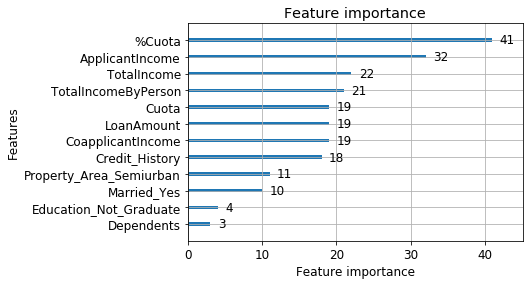

In [131]:
lgbm.plot_importance(lgbm_booster)